# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>1. Data Loading and Overview</strong></p>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
# Check if there are any missing values
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
# Check if there are duplicate rows
df.duplicated().sum()

272

In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
# View the overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [7]:
# View the statistical description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
chest pain type,918.0,3.251634,0.931031,1.0,3.00,4.0,4.0,4.0
resting bp s,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
fasting blood sugar,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
resting ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.0,2.0
max heart rate,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
exercise angina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>2. Exploratory Data Analysis</strong></p>

In [8]:
# Print the number of unique values for each column
for col in df.columns:
    print(f'{col} has {df[col].nunique()} values')

age has 50 values
sex has 2 values
chest pain type has 4 values
resting bp s has 67 values
cholesterol has 222 values
fasting blood sugar has 2 values
resting ecg has 3 values
max heart rate has 119 values
exercise angina has 2 values
oldpeak has 53 values
ST slope has 4 values
target has 2 values


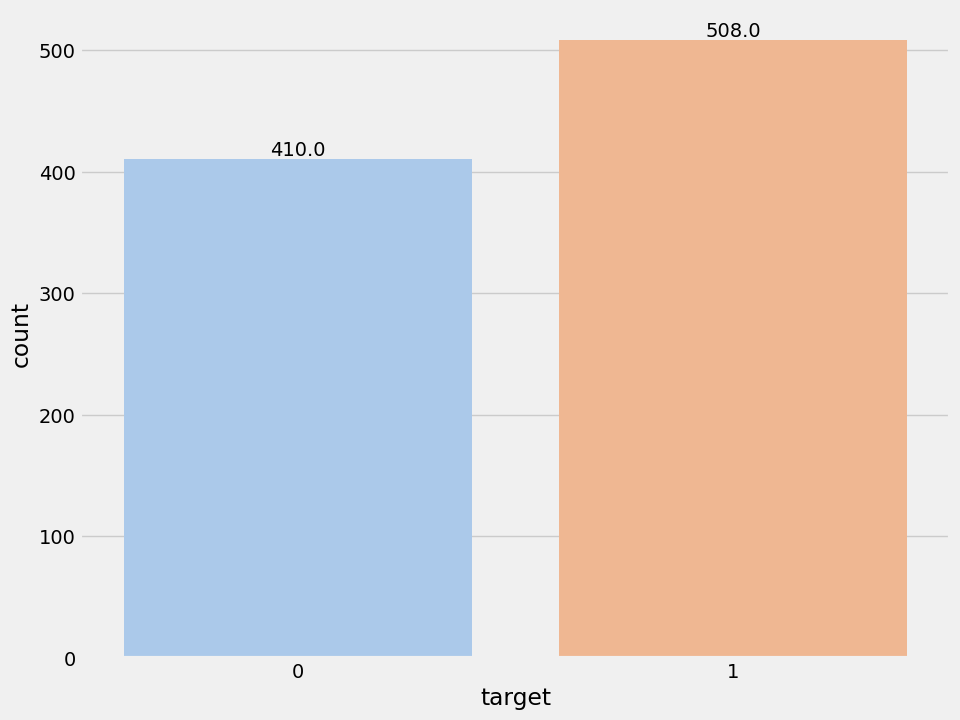

In [9]:
# Target distribution
# Set the figure size and create a count plot
plt.figure(figsize=(10, 8))
ax = sns.countplot(x=df['target'], palette='pastel')

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{p.get_height()}', ha="center")

plt.show()

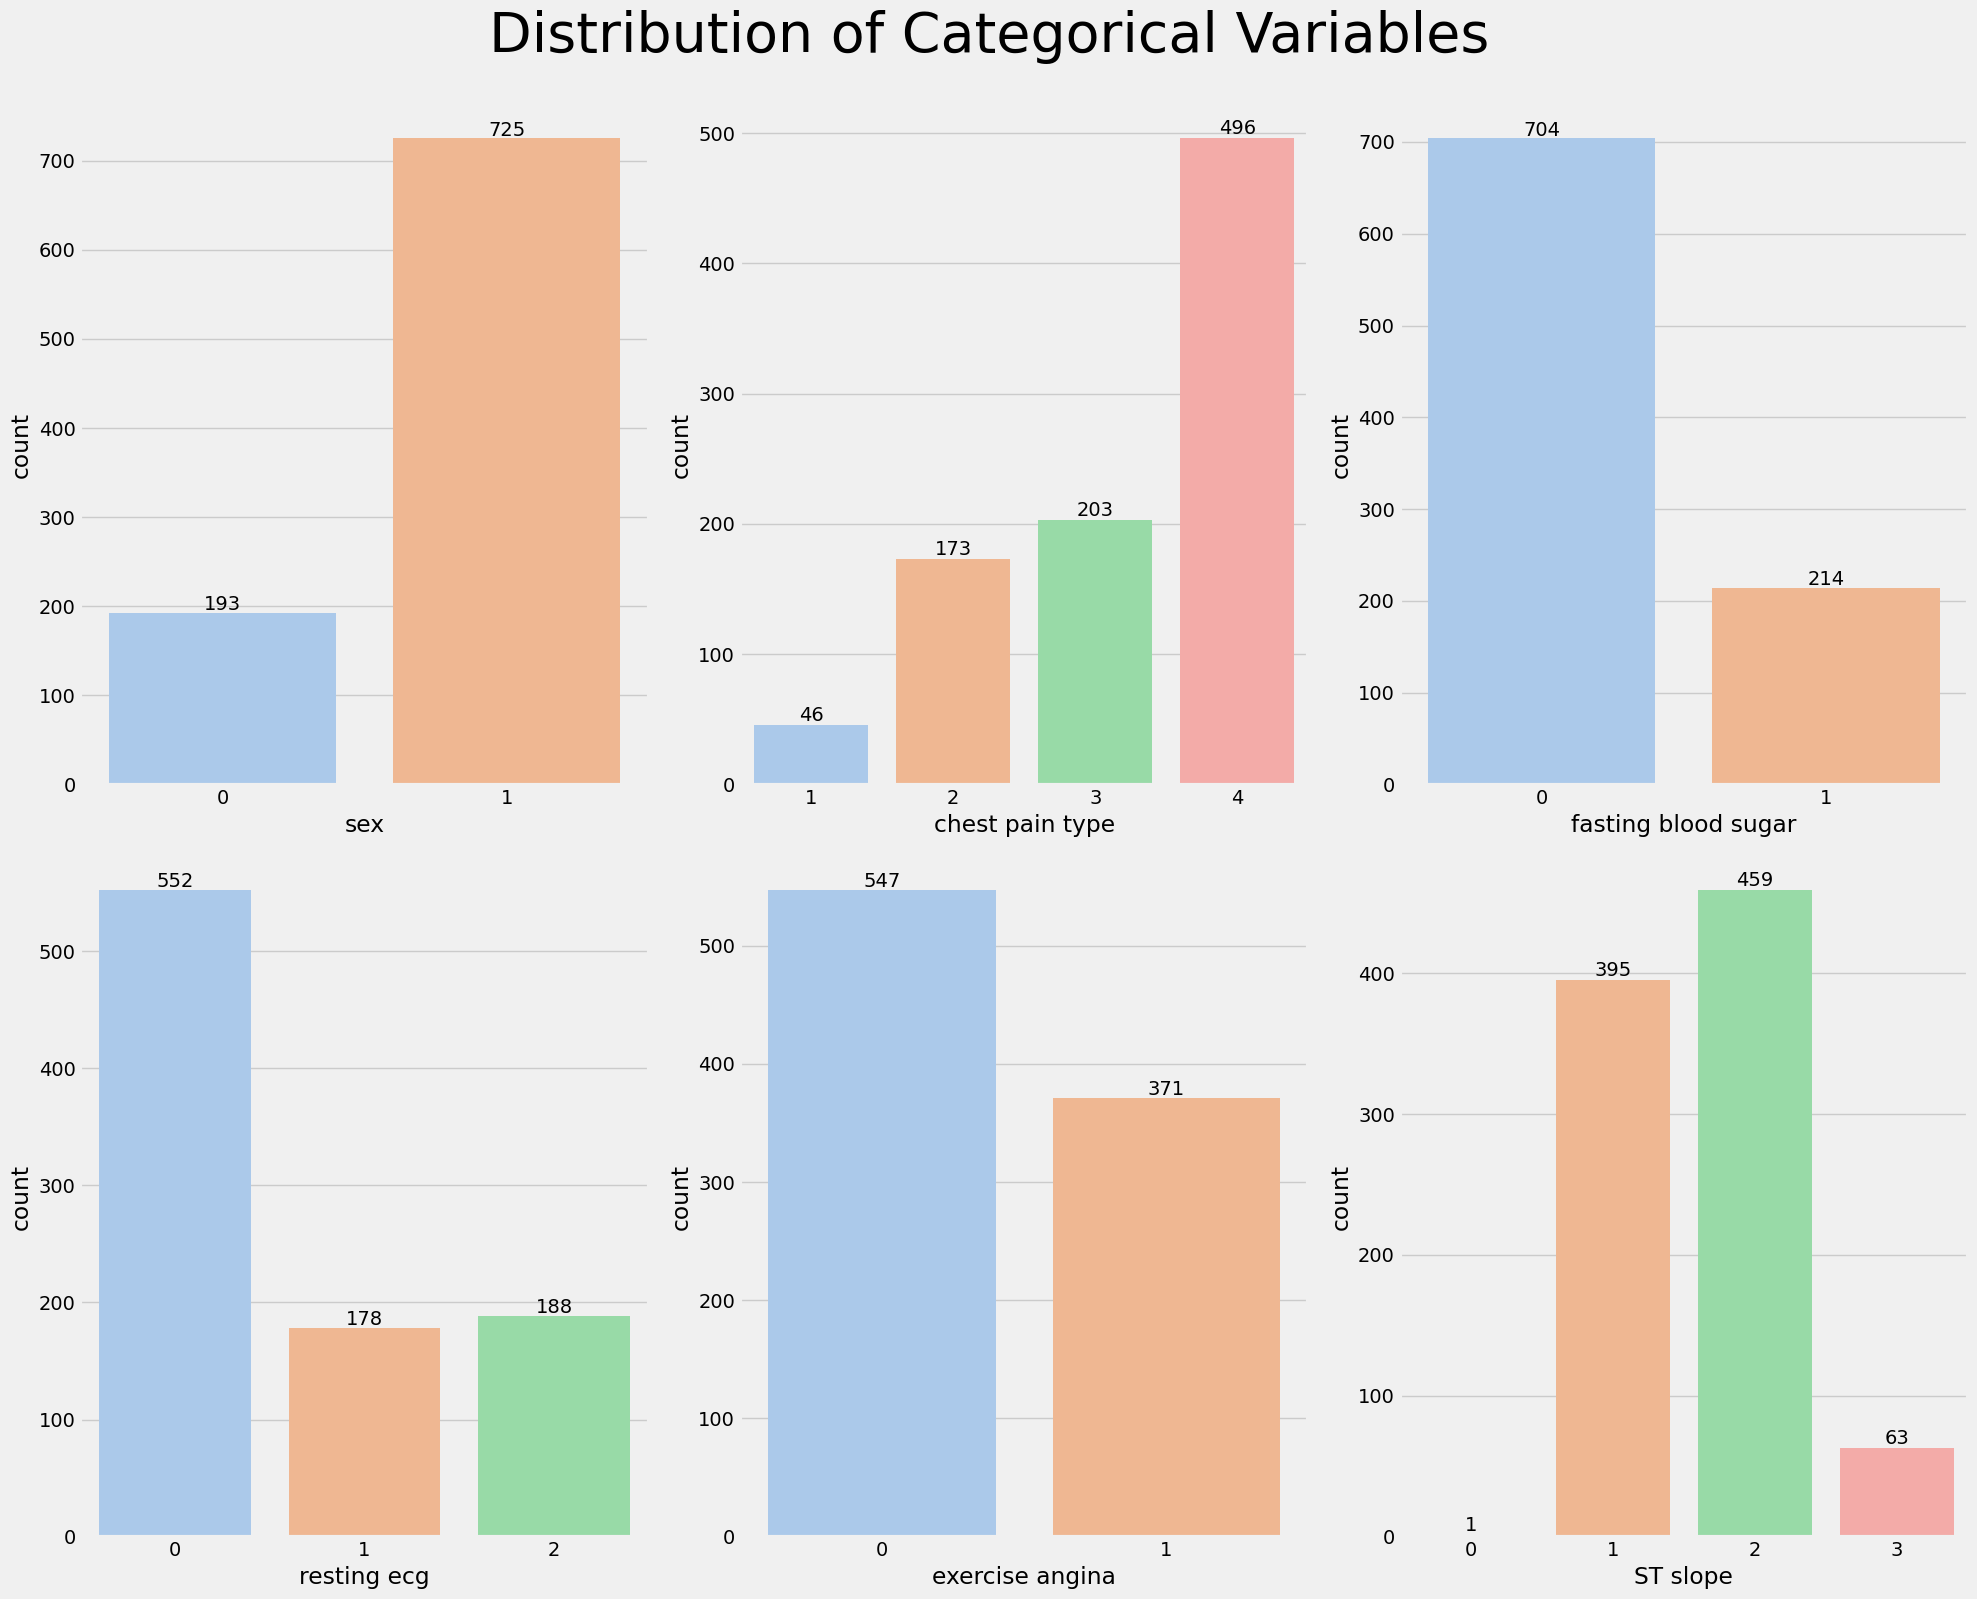

In [10]:
# Distribution of categorical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in df.columns:
    # Check if the number of unique values is less than 5
    if df[col].nunique() < 5:
        if plotnumber <= 6:
            plt.subplot(2, 3, plotnumber)
            ax = sns.countplot(x=df[col], palette='pastel')
            
            # Add labels to each bar in the plot
            for p in ax.patches:
                ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{int(p.get_height())}', ha="center")
                
        plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

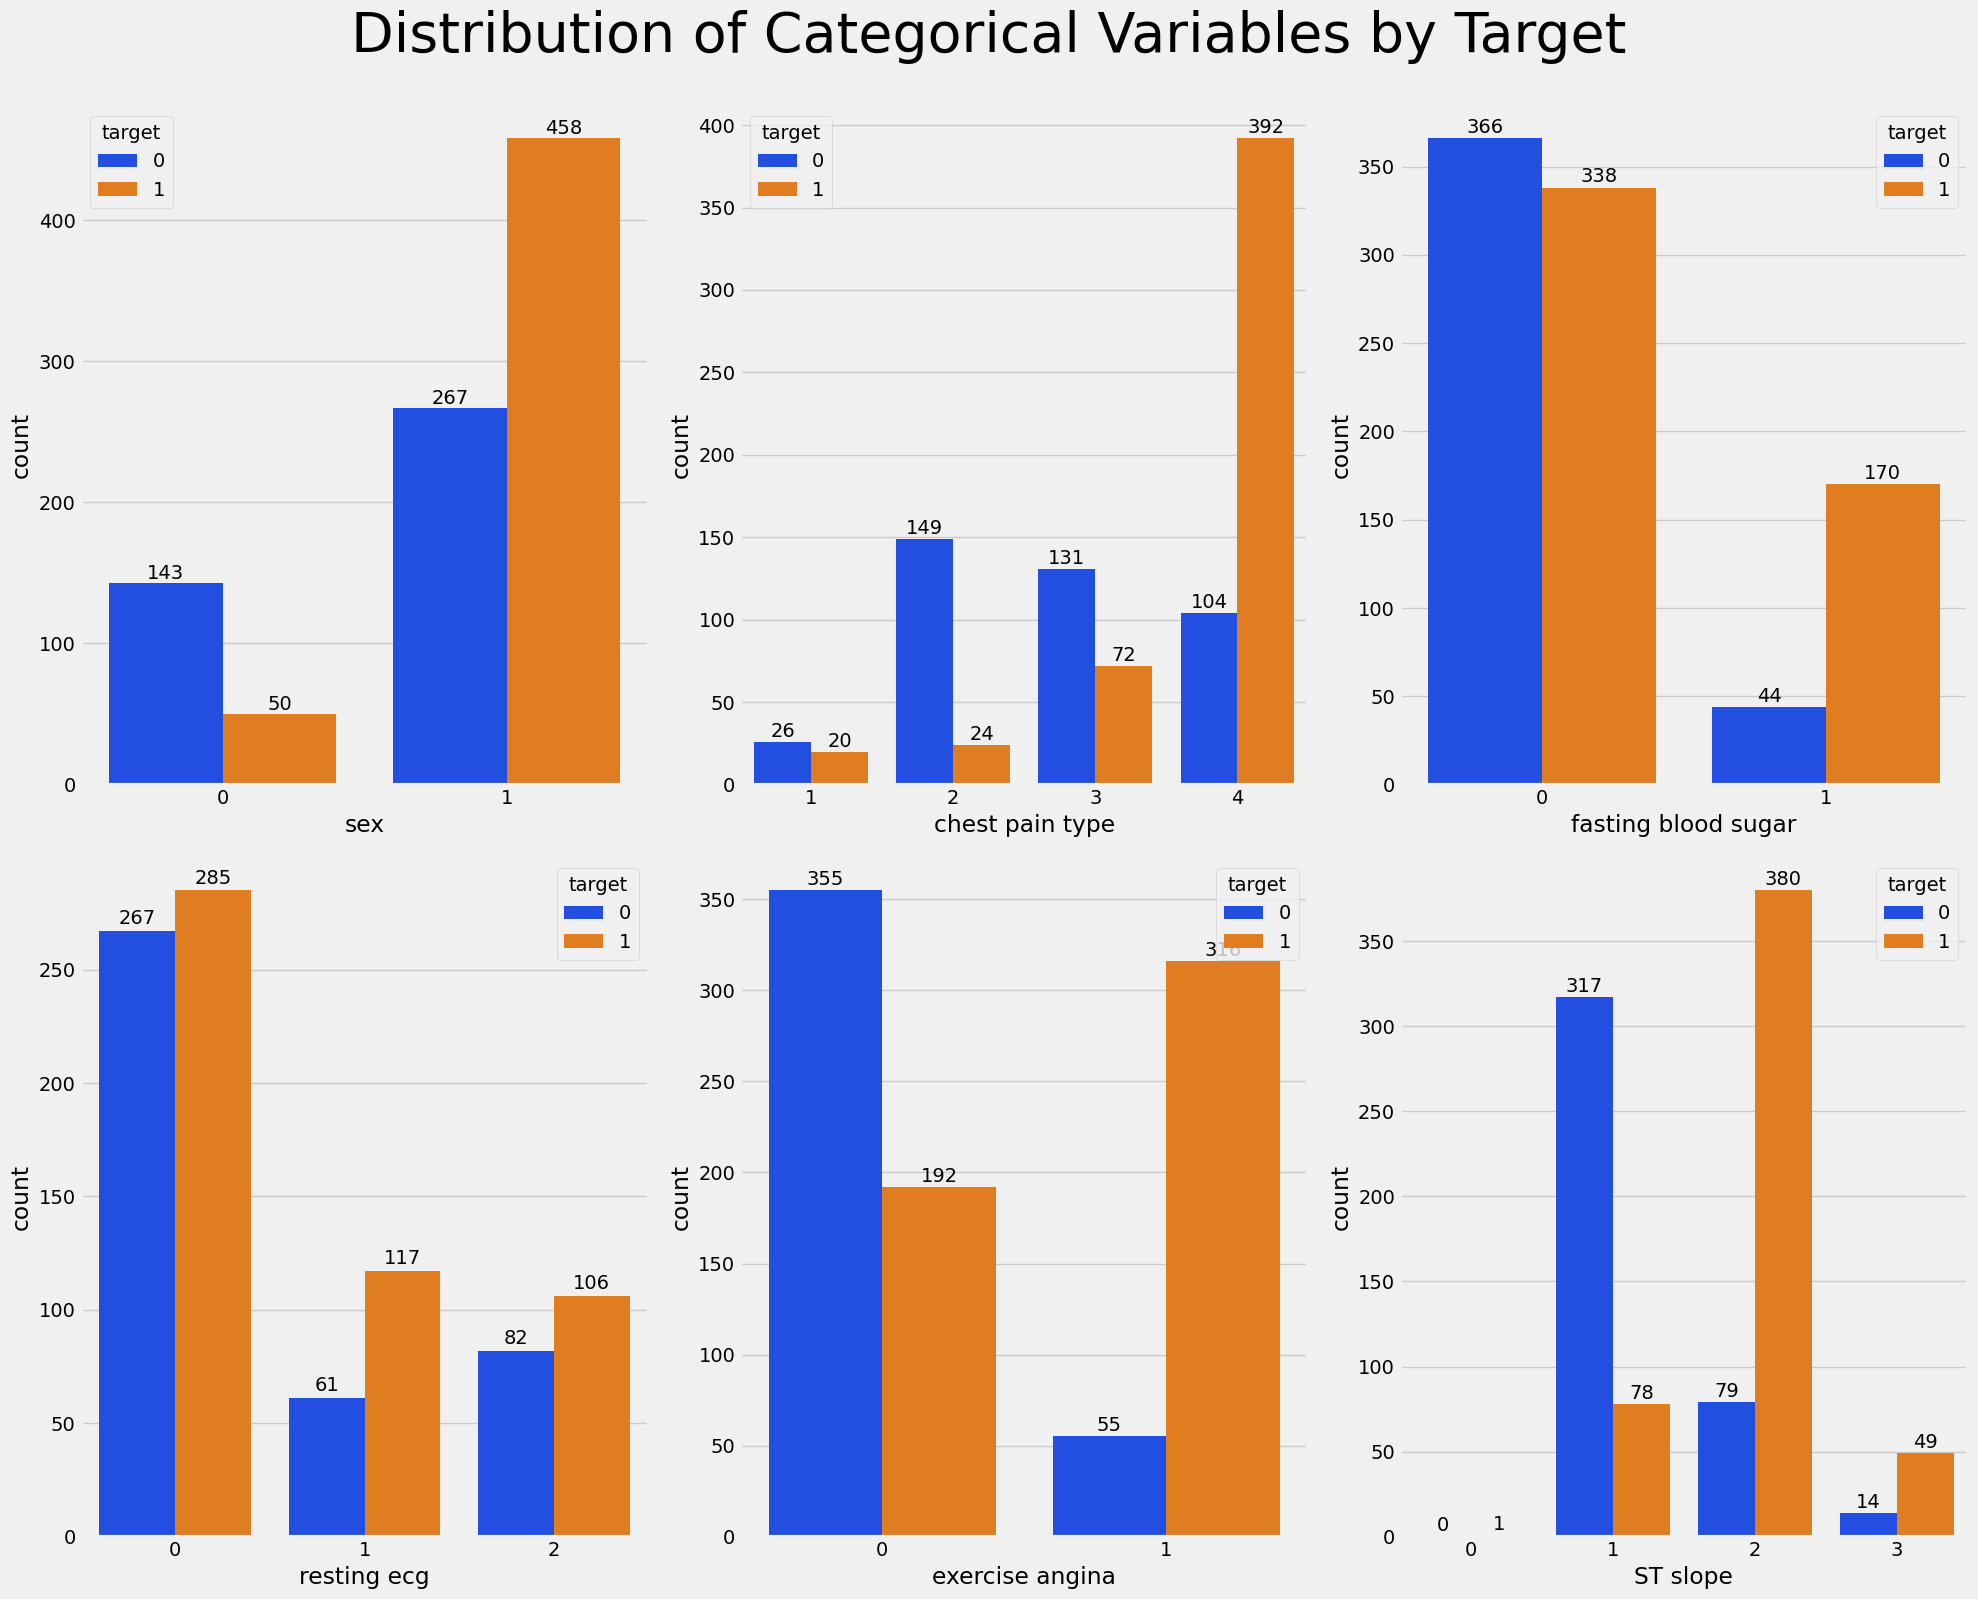

In [11]:
plt.figure(figsize=(20, 16))
plotnumber = 1

# Loop through each column in the dataframe
for col in df.columns:
    # Check if the number of unique values is less than 5
    if df[col].nunique() < 5:
        if plotnumber <= 6:
            plt.subplot(2, 3, plotnumber)
            ax = sns.countplot(x=df[col], hue=df['target'], palette='bright')
            
            # Add labels to each bar in the plot
            for p in ax.patches:
                ax.text(p.get_x() + p.get_width() / 2., 
                        p.get_height() + 3, 
                        f'{int(p.get_height())}', 
                        ha="center")
                
        plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by Target', fontsize=40, y=1)
plt.tight_layout()
plt.show()

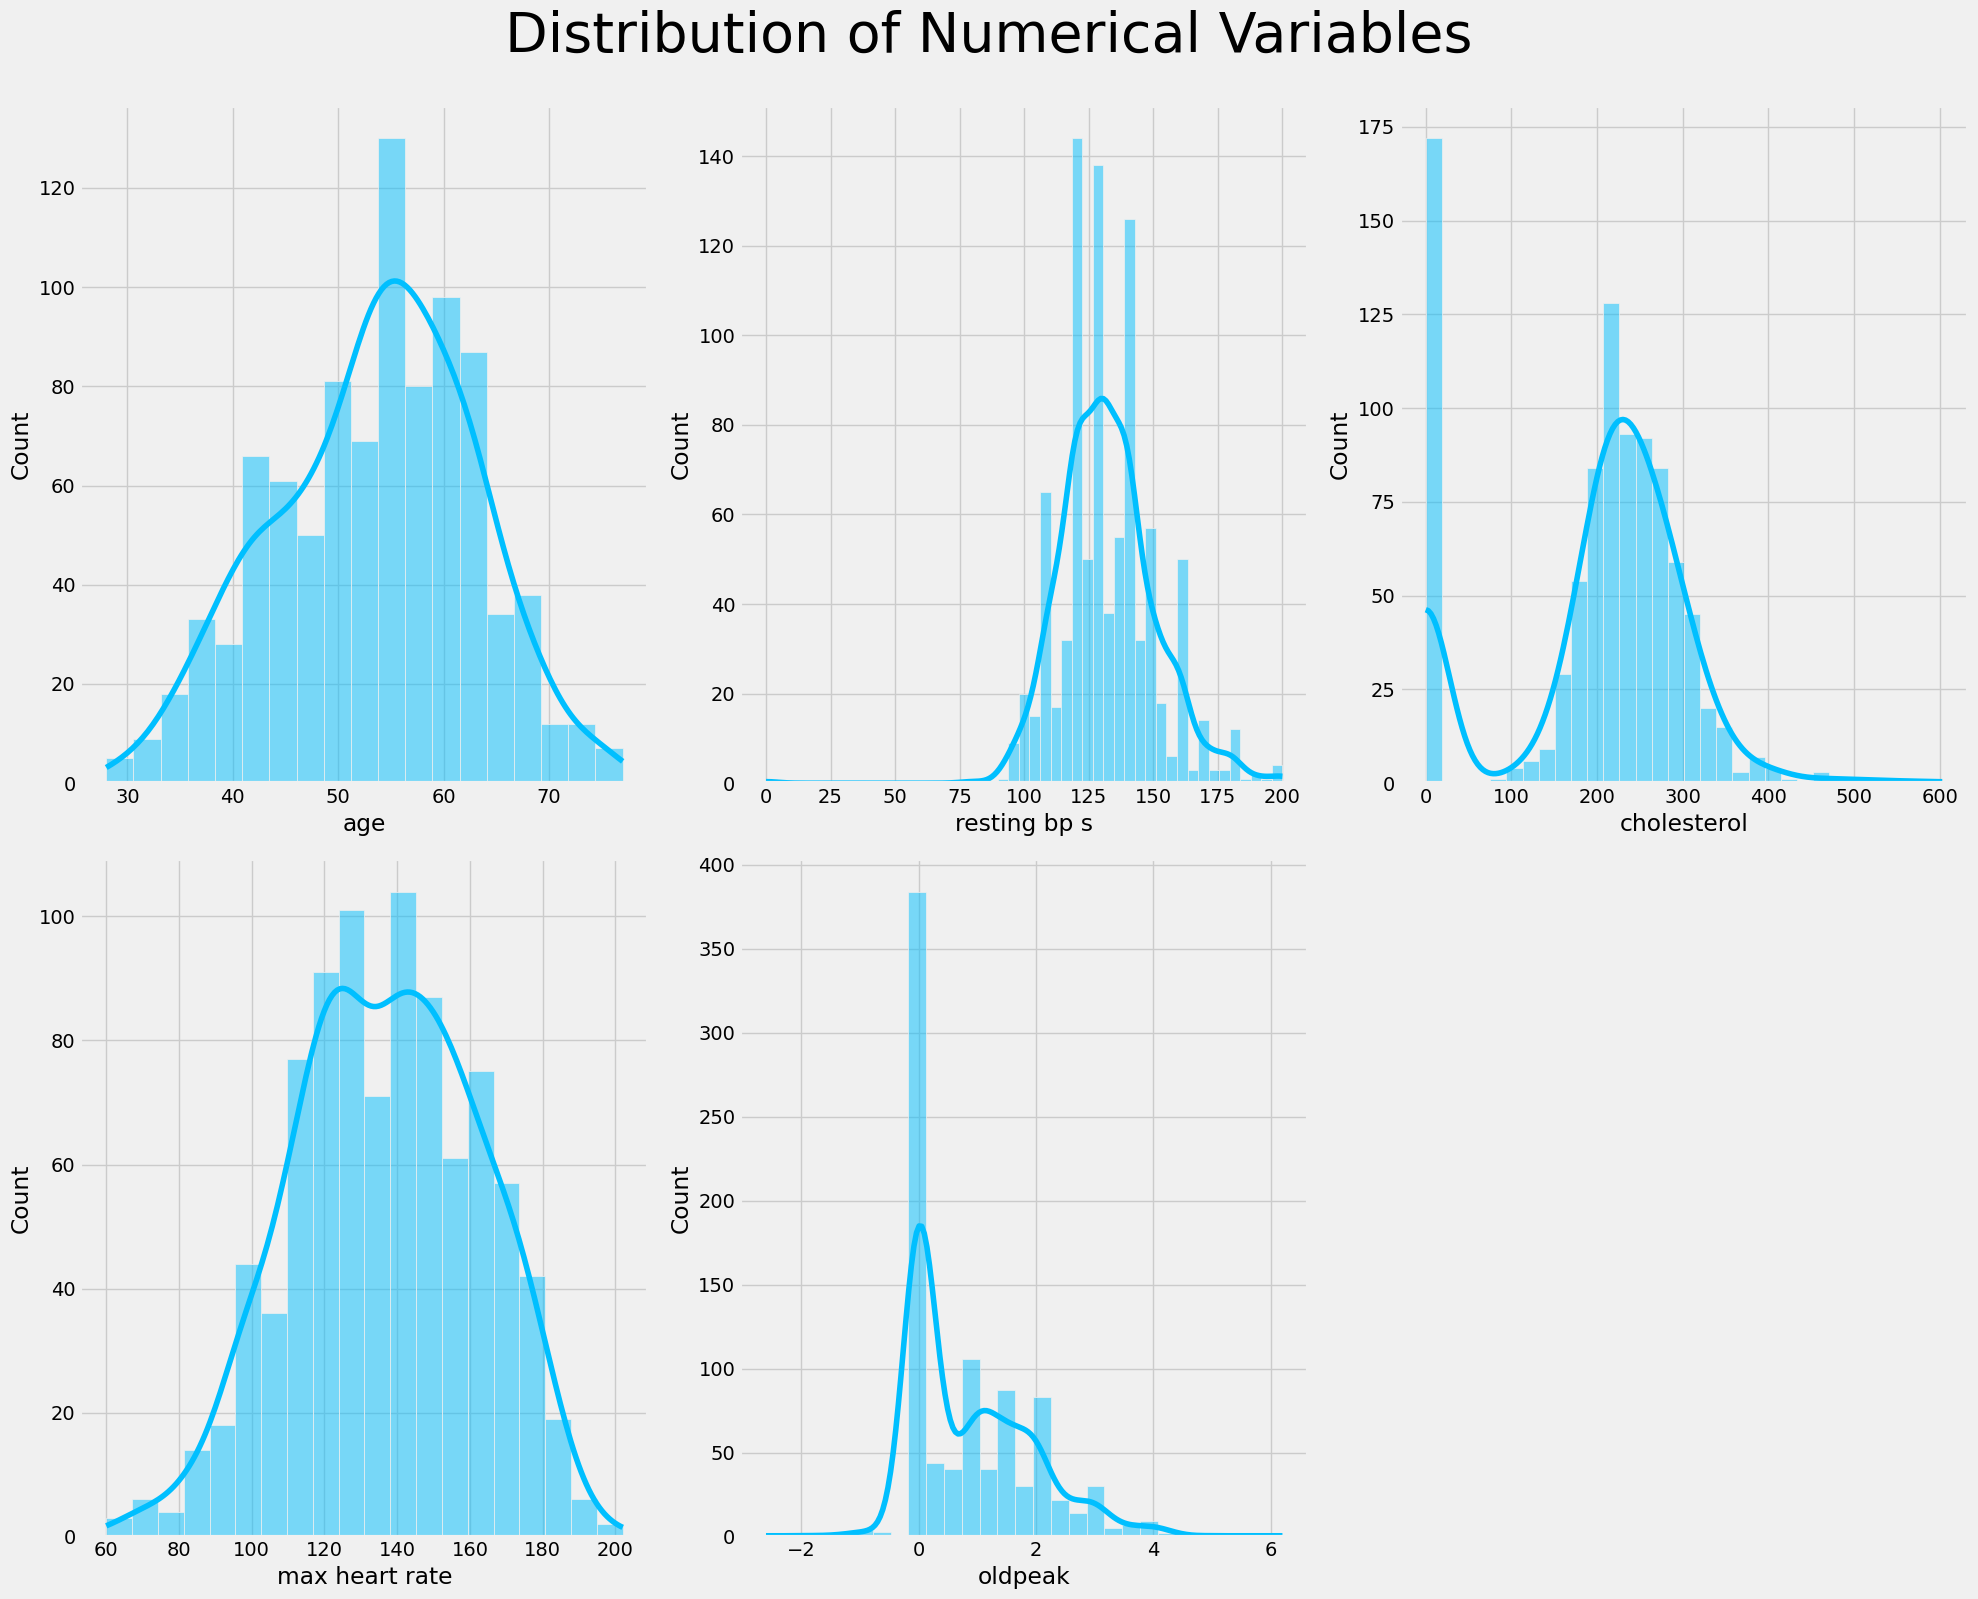

In [12]:
# Distribution of numerical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in df.columns:
    # Check if the number of unique values is less than 5
    if df[col].nunique() > 5:
        plt.subplot(2, 3, plotnumber)
        sns.histplot(df[col], kde=True, color='deepskyblue')
        plt.xlabel(col)
        
        plotnumber += 1

plt.suptitle('Distribution of Numerical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

In [13]:
# Replace zeros in the 'Serum Cholesterol' column with numpy.nan
# because zero is not a valid value for cholesterol levels
# and should be considered as missing data instead.
df['cholesterol'] = df['cholesterol'].replace(0, np.nan)
df['cholesterol'].isnull().sum()

172

In [14]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)
# Impute missing values using the KNN method
df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

df['cholesterol'].isnull().sum()

0

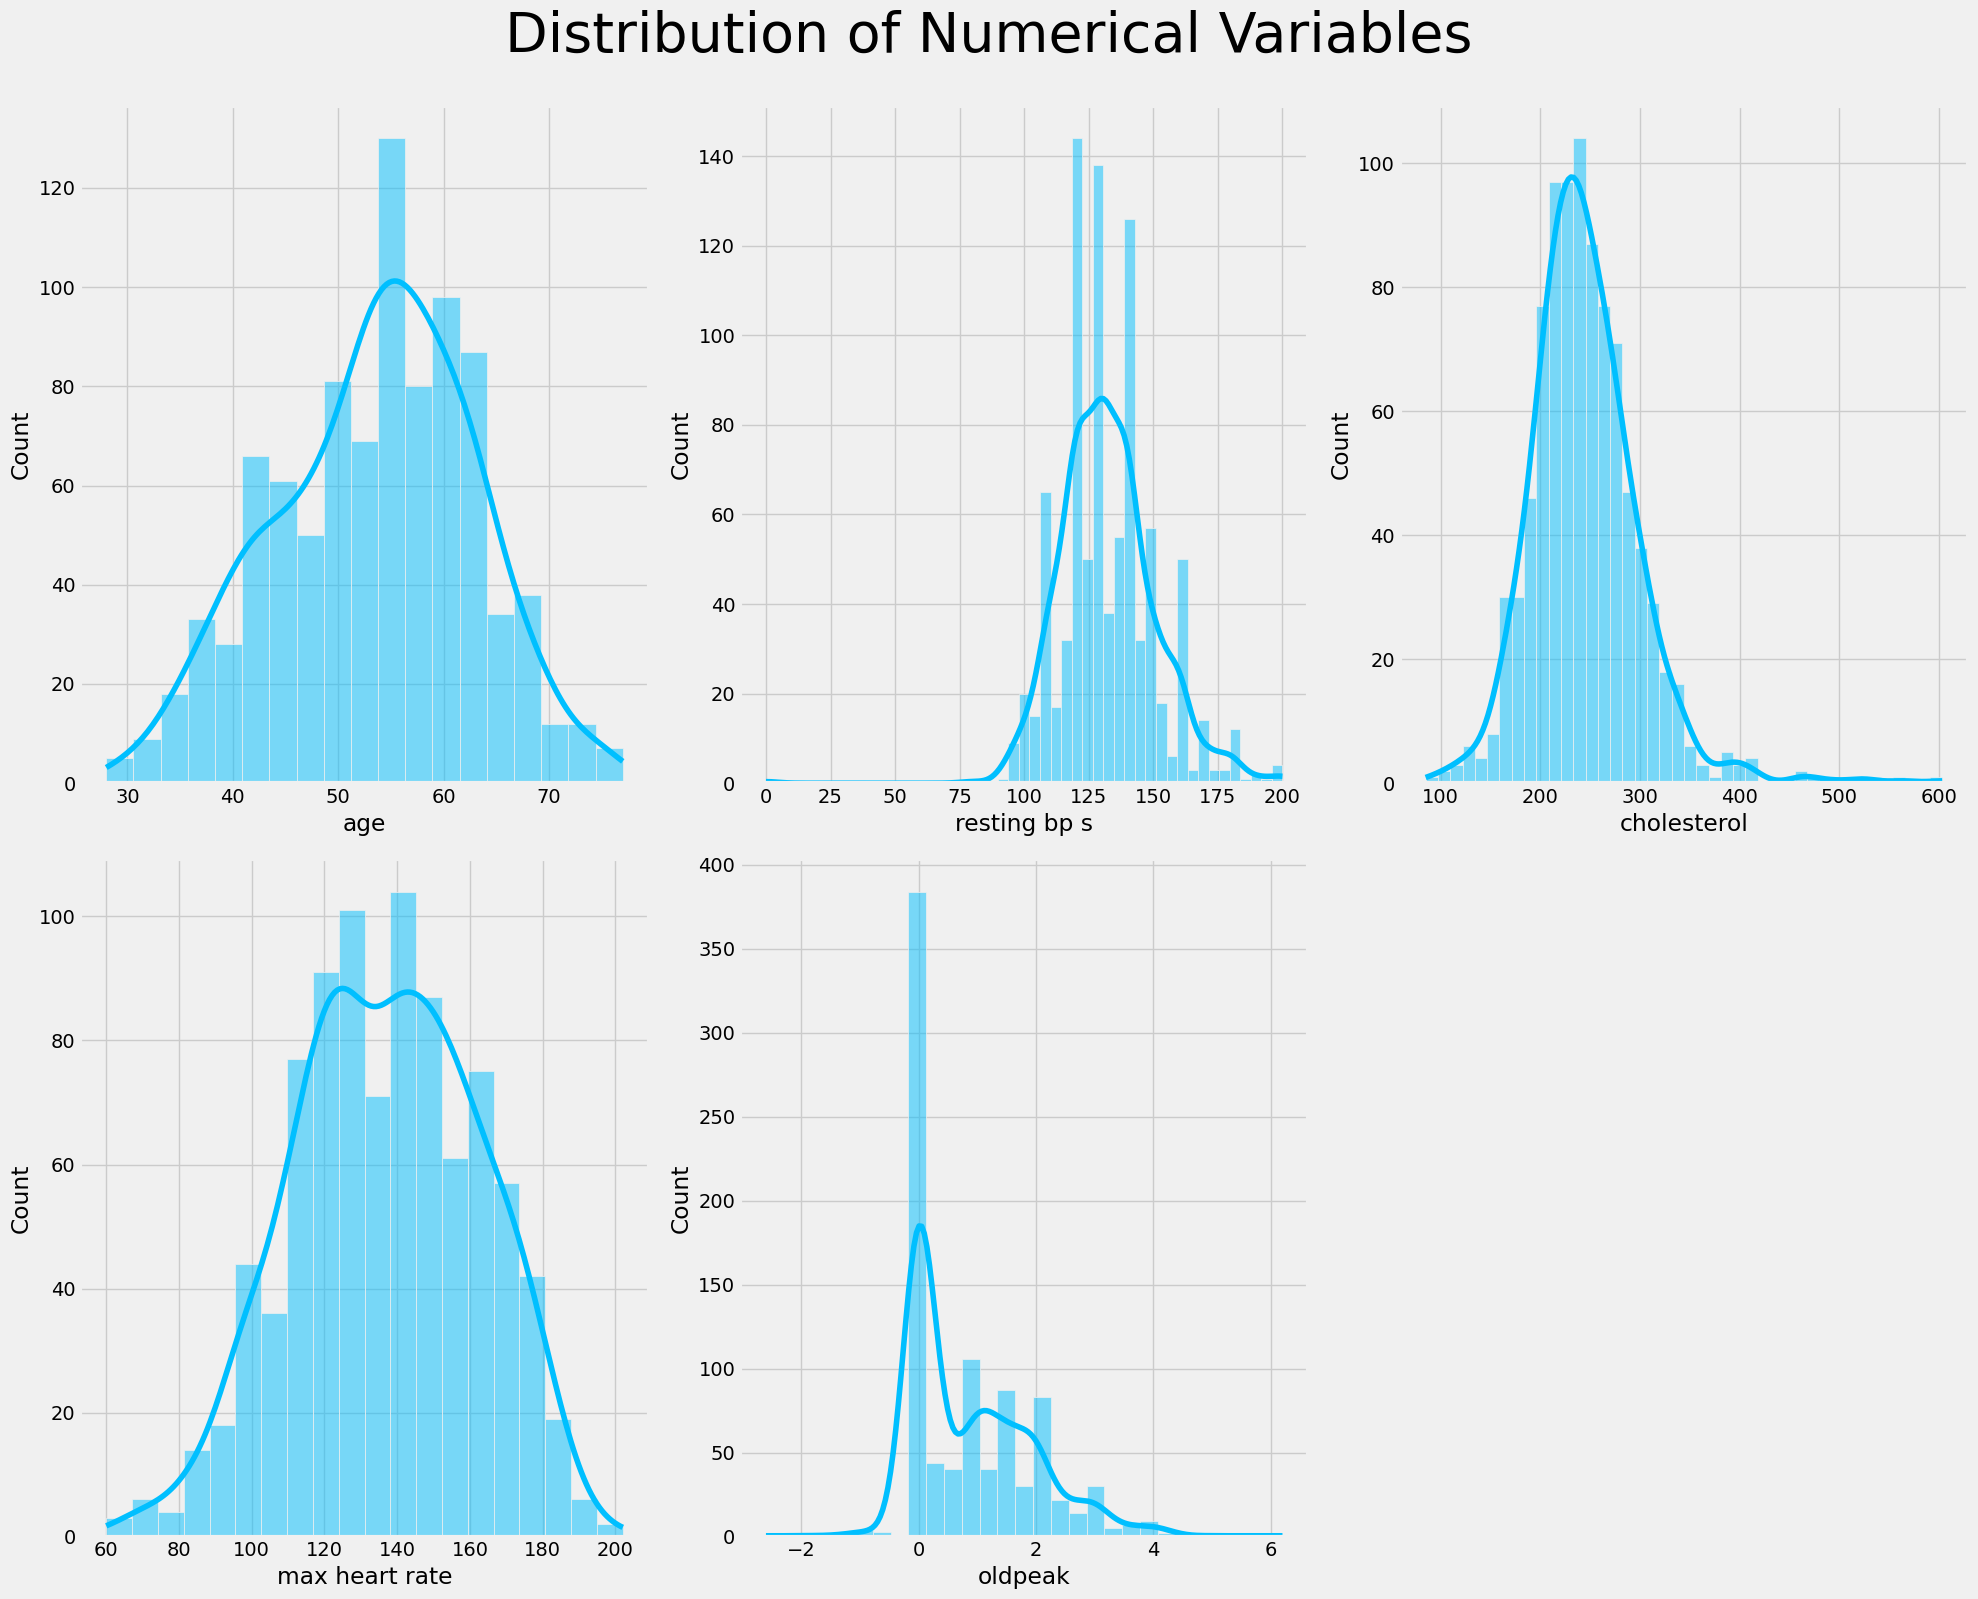

In [15]:
# Distribution of numerical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in df.columns:
    # Check if the number of unique values is less than 5
    if df[col].nunique() > 5:
        plt.subplot(2, 3, plotnumber)
        sns.histplot(df[col], kde=True, color='deepskyblue')
        plt.xlabel(col)
        
        plotnumber += 1

plt.suptitle('Distribution of Numerical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

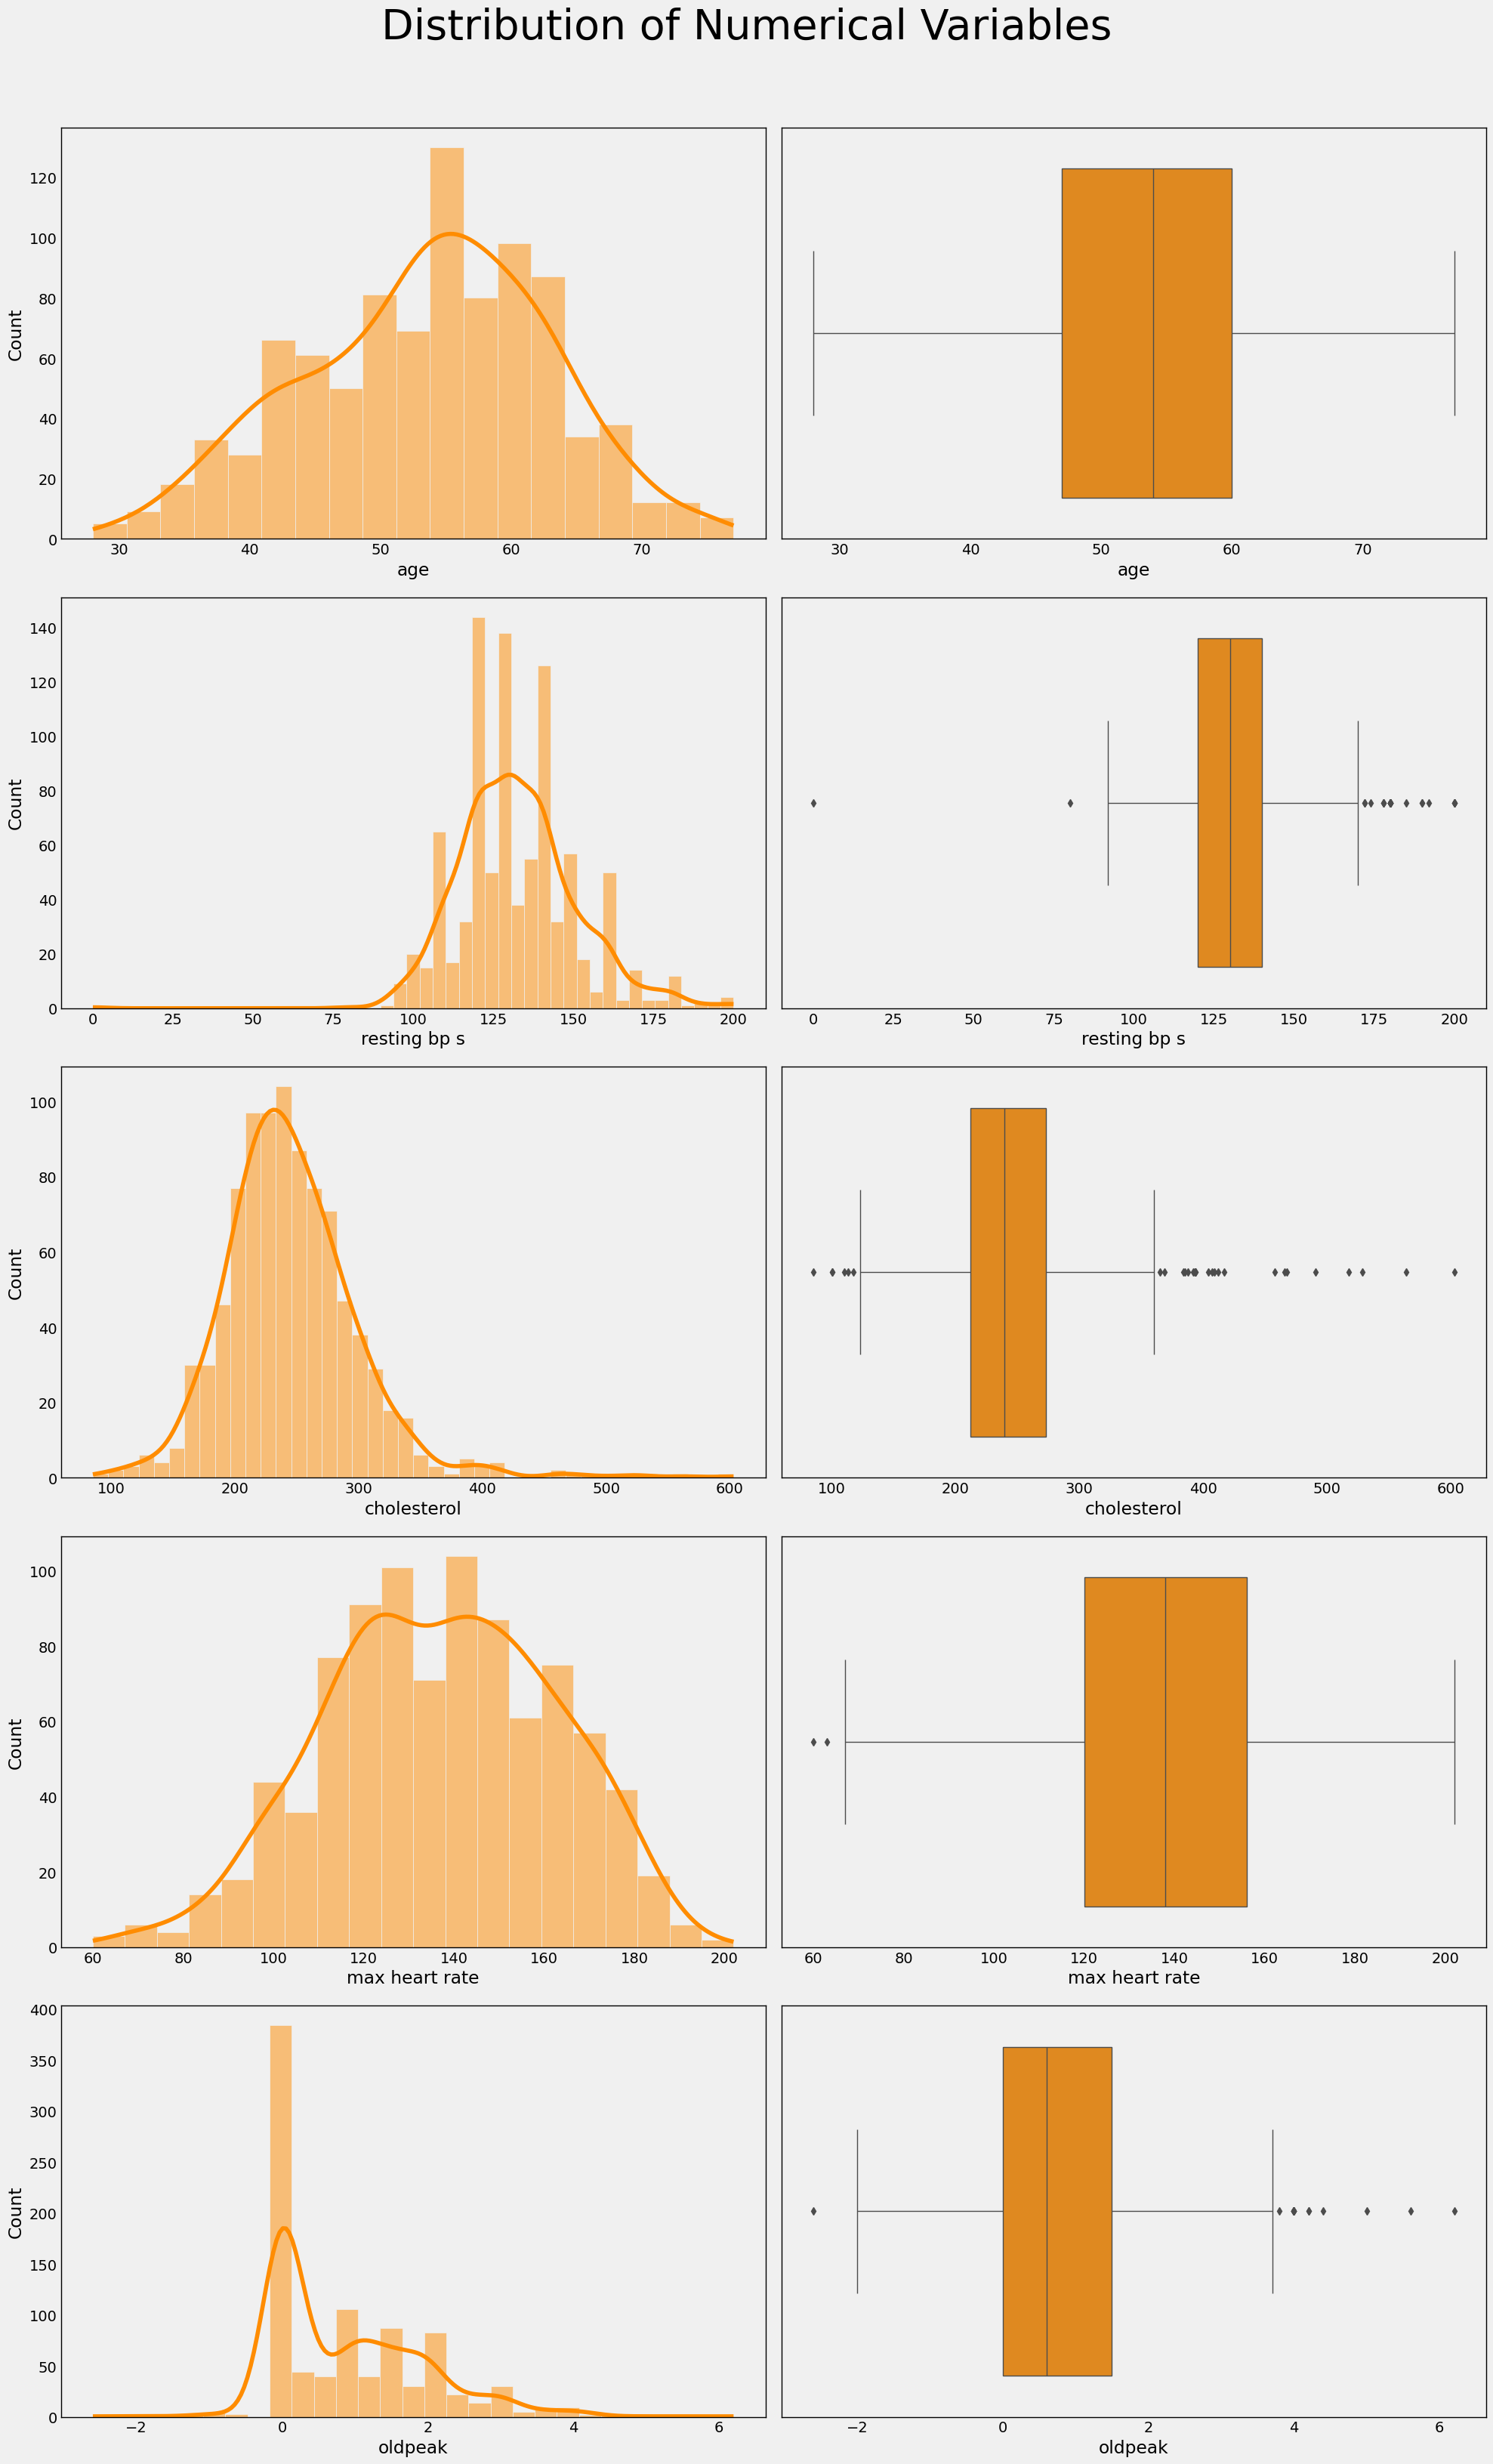

In [16]:
plt.figure(figsize=(20, 32))
plotnumber = 1

# Select numerical columns with more than 5 unique values
num_columns = [col for col in df.columns if df[col].nunique() > 5]

# Create subplots for histograms and horizontal boxplots
for col in num_columns:
    # Histogram
    ax = plt.subplot(len(num_columns), 2, plotnumber)
    sns.histplot(df[col], kde=True, color='darkorange')
    plt.xlabel(col)
    plt.grid(False)
    
    # Add border to histogram using spines
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    
    plotnumber += 1
    
    # Boxplot
    ax = plt.subplot(len(num_columns), 2, plotnumber)
    sns.boxplot(x=df[col], color='darkorange', width=0.8, linewidth=1)
    plt.xlabel(col)
    plt.grid(False)
    
    # Add border to boxplot using spines
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    
    plotnumber += 1

# Set the main title and adjust layout
plt.suptitle('Distribution of Numerical Variables', fontsize=40, y=1.02)
plt.tight_layout()
plt.show()

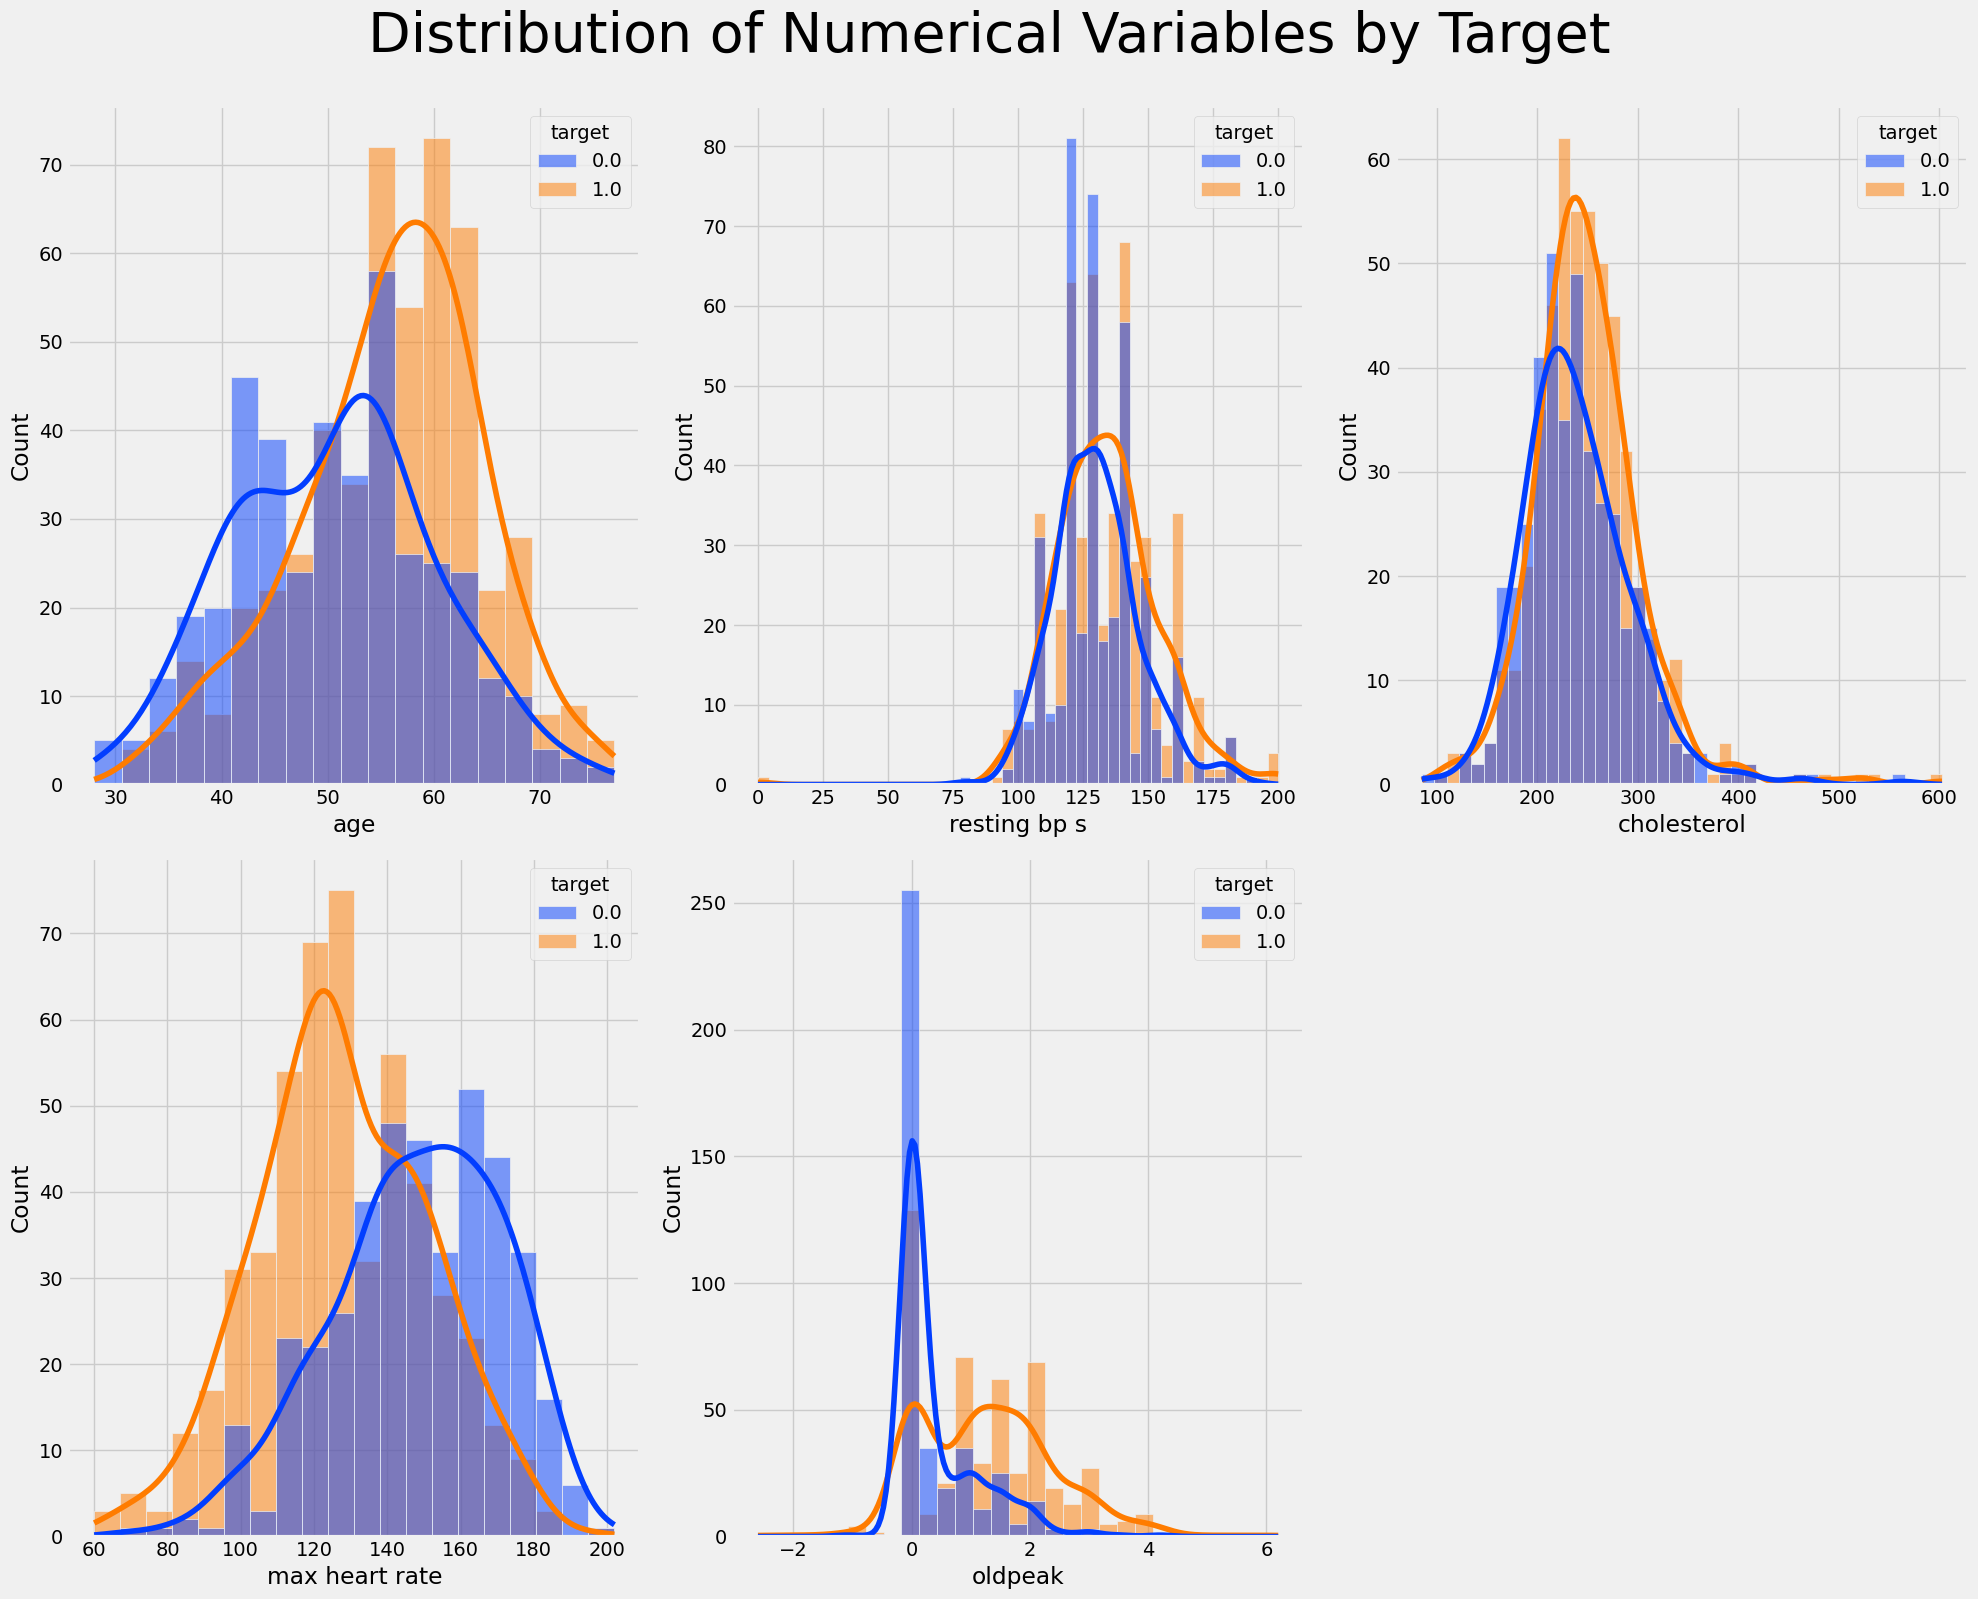

In [17]:
plt.figure(figsize=(20, 16))
plotnumber = 1

# Loop through each column in the dataframe
for col in df.columns:
    # Check if the number of unique values is more than 5
    if df[col].nunique() > 5:
        plt.subplot(2, 3, plotnumber)
        sns.histplot(data=df, x=col, hue='target', kde=True, palette='bright')  # Use 'hue' to differentiate by target
        plt.xlabel(col)
        plotnumber += 1

# Set the main title and adjust layout
plt.suptitle('Distribution of Numerical Variables by Target', fontsize=40, y=1)
plt.tight_layout()
plt.show()

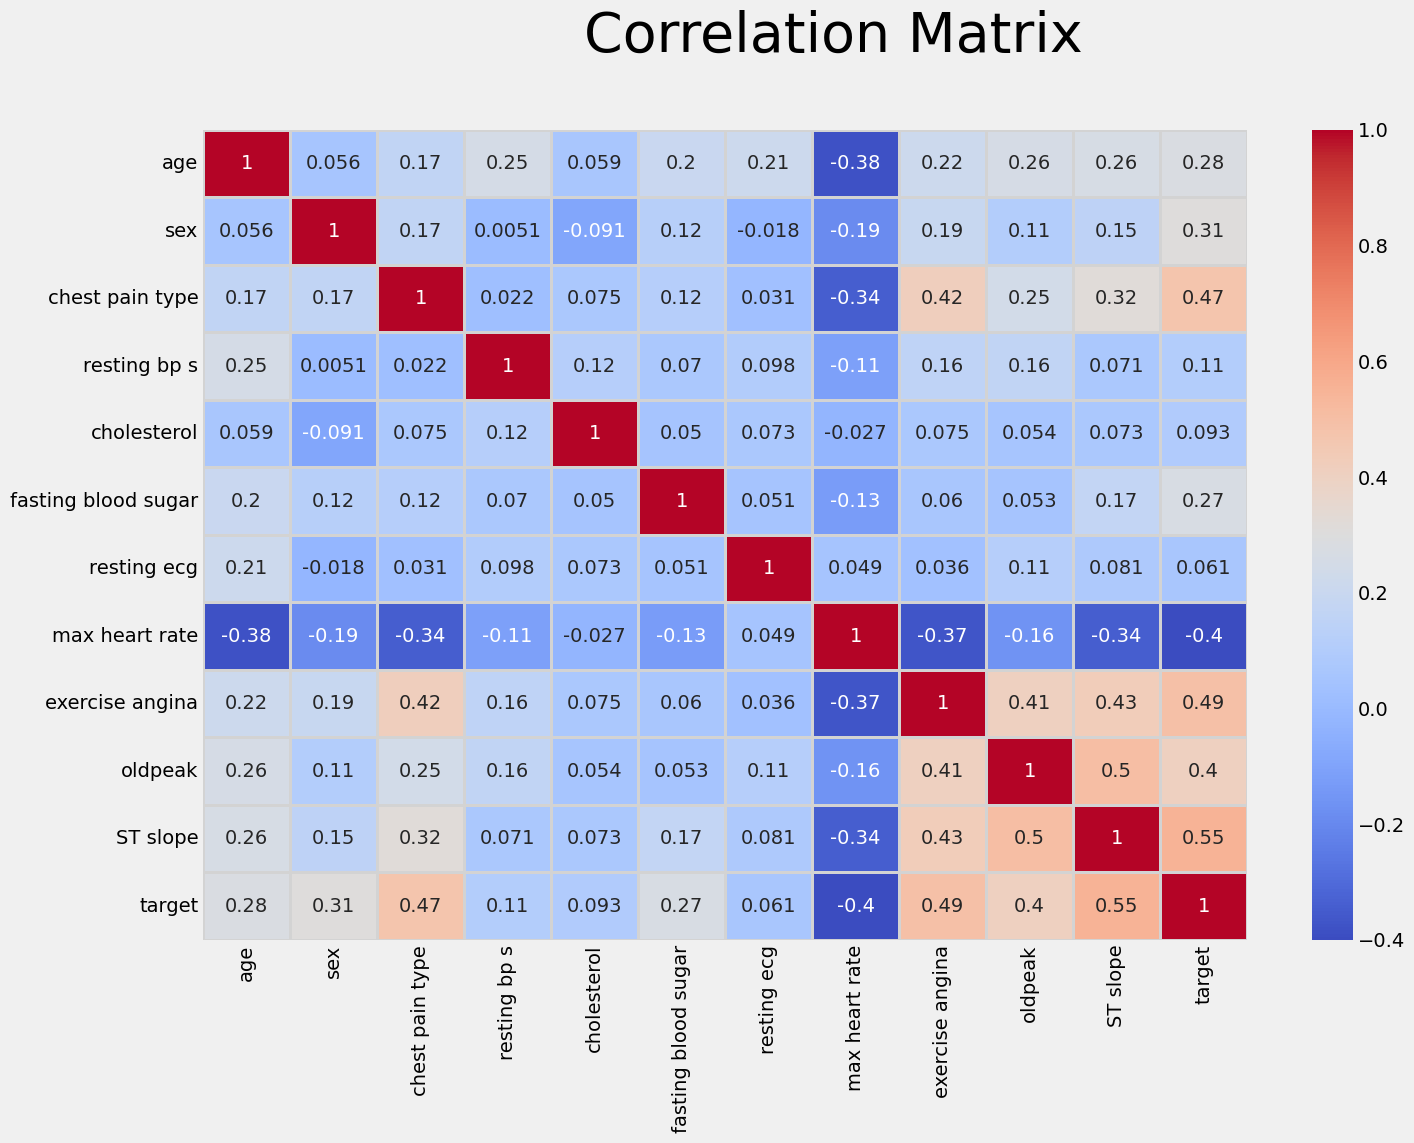

In [18]:
# Correlation matrix
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>3. Feature Engineering</strong></p>

In [19]:
# Create descriptive statistical features
# Basic statistics: Providing the model with simple statistical descriptions of the raw data.
df['sum'] = df[df.columns].sum(axis=1)   # Sum of features
df['std'] = df[df.columns].std(axis=1)   # Standard deviation
df['mean'] = df[df.columns].mean(axis=1) # Mean
df['max'] = df[df.columns].max(axis=1)   # Maximum value
df['min'] = df[df.columns].min(axis=1)   # Minimum value
df['mode'] = df[df.columns].mode(axis=1)[0]  # Mode
df['median'] = df[df.columns].median(axis=1) # Median
df['q_25th'] = df[df.columns].quantile(0.25, axis=1) # 25th percentile
df['q_75th'] = df[df.columns].quantile(0.75, axis=1) # 75th percentile
df['skew'] = df[df.columns].skew(axis=1) # Skewness
df['kurt'] = df[df.columns].kurt(axis=1) # Kurtosis
df['range'] = df[df.columns].max(axis=1) - df[df.columns].min(axis=1)  # Range of feature values per row

In [20]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,...,mean,max,min,mode,median,q_25th,q_75th,skew,kurt,range
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,...,105.542908,645.0,0.0,0.0,1.5,0.0,148.000000,2.135247,4.342134,645.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,...,90.069778,552.0,0.0,0.0,2.5,0.0,156.244222,2.152534,4.541174,552.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,...,90.658457,553.0,0.0,0.0,1.5,0.0,106.000000,2.137865,4.226918,553.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,...,84.527887,517.5,0.0,0.0,3.0,0.5,115.500000,2.185278,4.601234,517.5
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,...,85.854780,526.0,0.0,0.0,2.0,0.0,128.991730,2.178334,4.626720,526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,...,91.194691,557.2,0.0,0.0,1.6,0.5,115.500000,2.157527,4.389003,557.2
914,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,...,91.034996,558.4,0.0,0.0,3.7,1.0,141.750000,2.206148,4.772612,558.4
915,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,...,72.220134,443.2,0.0,0.0,3.0,1.0,117.420469,2.208186,4.803548,443.2
916,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,...,98.635129,604.0,0.0,0.0,2.0,0.0,140.722952,2.177251,4.594439,604.0


# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>4. Modelling</strong></p>

In [21]:
# Prepare data
# Define independent variables
ind_col = [col for col in df.columns if col!='target']
# Define dependent variable
dep_col = 'target'

X = df[ind_col]
y = df[dep_col]

# For later use in feature importance plotting
dataframe = df[ind_col]

In [22]:
from sklearn.preprocessing import StandardScaler

# Features features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, X_train, y_train, X_test, y_test):
    """
    Train, predict, and evaluate a classifier.
    
    Parameters:
        classifier: The machine learning classifier to train and evaluate.
        model_name: A string representing the name of the model for display.
        X_train, y_train: Training data and labels.
        X_test, y_test: Testing data and labels.
        
    Returns:
        A dictionary with confusion matrix, accuracy, precision, recall, and F1 score.
    """
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)
    
    # Print the evaluation metrics
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")
    
    # Return the metrics as a dictionary
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.1 K-Nearest Neighbors (KNN)</strong></p>

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_name = "K-Nearest Neighbors"
knn_results = evaluate_model(knn, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of K-Nearest Neighbors: 0.89097

Confusion Matrix:
[[100  12]
 [ 17 147]]

Test Accuracy of K-Nearest Neighbors: 0.89493
Test Precision of K-Nearest Neighbors: 0.88961
Test Recall of K-Nearest Neighbors: 0.89460
Test F1 Score of K-Nearest Neighbors: 0.89179

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       112
         1.0       0.92      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.90       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.2 Gaussian Naive Bayes</strong></p>

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model_name = "Gaussian Naive Bayes"
gnb_results = evaluate_model(gnb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Gaussian Naive Bayes: 0.84268

Confusion Matrix:
[[104   8]
 [ 34 130]]

Test Accuracy of Gaussian Naive Bayes: 0.84783
Test Precision of Gaussian Naive Bayes: 0.84783
Test Recall of Gaussian Naive Bayes: 0.86063
Test F1 Score of Gaussian Naive Bayes: 0.84646

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83       112
         1.0       0.94      0.79      0.86       164

    accuracy                           0.85       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.87      0.85      0.85       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.3 Logistic Regression</strong></p>

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_name = "Logistic Regression"
logreg_results = evaluate_model(logreg, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Logistic Regression: 0.91589

Confusion Matrix:
[[107   5]
 [ 14 150]]

Test Accuracy of Logistic Regression: 0.93116
Test Precision of Logistic Regression: 0.92602
Test Recall of Logistic Regression: 0.93500
Test F1 Score of Logistic Regression: 0.92945

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       112
         1.0       0.97      0.91      0.94       164

    accuracy                           0.93       276
   macro avg       0.93      0.93      0.93       276
weighted avg       0.93      0.93      0.93       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.4 Support Vector Machine (SVM)</strong></p>

In [28]:
from sklearn.svm import SVC

svm = SVC()
model_name = 'Support Vector Machine'
svm_results = evaluate_model(svm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Support Vector Machine: 0.91589

Confusion Matrix:
[[ 98  14]
 [ 16 148]]

Test Accuracy of Support Vector Machine: 0.89130
Test Precision of Support Vector Machine: 0.88661
Test Recall of Support Vector Machine: 0.88872
Test F1 Score of Support Vector Machine: 0.88762

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       112
         1.0       0.91      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.5 Decision Tree</strong></p>

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model_name = 'Decision Tree'
dtc_results = evaluate_model(dtc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Decision Tree: 1.00000

Confusion Matrix:
[[102  10]
 [ 35 129]]

Test Accuracy of Decision Tree: 0.83696
Test Precision of Decision Tree: 0.83629
Test Recall of Decision Tree: 0.84865
Test F1 Score of Decision Tree: 0.83538

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82       112
         1.0       0.93      0.79      0.85       164

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.6 Random Forest</strong></p>

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_name = 'Random Forest'
rfc_results = evaluate_model(rfc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Random Forest: 1.00000

Confusion Matrix:
[[105   7]
 [ 16 148]]

Test Accuracy of Random Forest: 0.91667
Test Precision of Random Forest: 0.91130
Test Recall of Random Forest: 0.91997
Test F1 Score of Random Forest: 0.91459

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       112
         1.0       0.95      0.90      0.93       164

    accuracy                           0.92       276
   macro avg       0.91      0.92      0.91       276
weighted avg       0.92      0.92      0.92       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.7 Extra Trees</strong></p>

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
model_name = 'Extra Trees'
etc_results = evaluate_model(etc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Extra Trees: 1.00000

Confusion Matrix:
[[104   8]
 [ 16 148]]

Test Accuracy of Extra Trees: 0.91304
Test Precision of Extra Trees: 0.90769
Test Recall of Extra Trees: 0.91551
Test F1 Score of Extra Trees: 0.91078

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90       112
         1.0       0.95      0.90      0.92       164

    accuracy                           0.91       276
   macro avg       0.91      0.92      0.91       276
weighted avg       0.92      0.91      0.91       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.8 Adaptive Boosting (AdaBoost)</strong></p>

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
model_name = 'AdaBoost'
ada_results = evaluate_model(ada, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of AdaBoost: 0.92679

Confusion Matrix:
[[107   5]
 [ 15 149]]

Test Accuracy of AdaBoost: 0.92754
Test Precision of AdaBoost: 0.92229
Test Recall of AdaBoost: 0.93195
Test F1 Score of AdaBoost: 0.92582

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.91       112
         1.0       0.97      0.91      0.94       164

    accuracy                           0.93       276
   macro avg       0.92      0.93      0.93       276
weighted avg       0.93      0.93      0.93       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.9 Histogram-based Gradient Boosting</strong></p>

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
model_name = 'Hist Gradient Boosting'
hgb_results = evaluate_model(hgb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Hist Gradient Boosting: 1.00000

Confusion Matrix:
[[104   8]
 [ 13 151]]

Test Accuracy of Hist Gradient Boosting: 0.92391
Test Precision of Hist Gradient Boosting: 0.91929
Test Recall of Hist Gradient Boosting: 0.92465
Test F1 Score of Hist Gradient Boosting: 0.92164

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       112
         1.0       0.95      0.92      0.93       164

    accuracy                           0.92       276
   macro avg       0.92      0.92      0.92       276
weighted avg       0.93      0.92      0.92       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.10 Gradient Boosting Machine (GBM)</strong></p>

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
model_name = 'Gradient Boosting Machine'
gbm_results = evaluate_model(gbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Gradient Boosting Machine: 0.97975

Confusion Matrix:
[[106   6]
 [ 14 150]]

Test Accuracy of Gradient Boosting Machine: 0.92754
Test Precision of Gradient Boosting Machine: 0.92244
Test Recall of Gradient Boosting Machine: 0.93053
Test F1 Score of Gradient Boosting Machine: 0.92565

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       112
         1.0       0.96      0.91      0.94       164

    accuracy                           0.93       276
   macro avg       0.92      0.93      0.93       276
weighted avg       0.93      0.93      0.93       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.11 Stochastic Gradient Boosting Machine (SGBM)</strong></p>

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a stochastic gradient boosting classifier
sgbm = GradientBoostingClassifier(subsample=0.7)  # Use a subsample ratio of 0.7 to emphasize randomness
model_name = 'Stochastic Gradient Boosting Machine'
sgbm_results = evaluate_model(sgbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Stochastic Gradient Boosting Machine: 0.98442

Confusion Matrix:
[[105   7]
 [ 15 149]]

Test Accuracy of Stochastic Gradient Boosting Machine: 0.92029
Test Precision of Stochastic Gradient Boosting Machine: 0.91506
Test Recall of Stochastic Gradient Boosting Machine: 0.92302
Test F1 Score of Stochastic Gradient Boosting Machine: 0.91821

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91       112
         1.0       0.96      0.91      0.93       164

    accuracy                           0.92       276
   macro avg       0.92      0.92      0.92       276
weighted avg       0.92      0.92      0.92       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.12 eXtreme Gradient Boosting (XGBoost)</strong></p>

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_name = 'XGBoost'
xgb_results = evaluate_model(xgb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of XGBoost: 1.00000

Confusion Matrix:
[[107   5]
 [ 11 153]]

Test Accuracy of XGBoost: 0.94203
Test Precision of XGBoost: 0.93757
Test Recall of XGBoost: 0.94414
Test F1 Score of XGBoost: 0.94037

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       112
         1.0       0.97      0.93      0.95       164

    accuracy                           0.94       276
   macro avg       0.94      0.94      0.94       276
weighted avg       0.94      0.94      0.94       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.13 Categorical Boosting (CatBoost)</strong></p>

In [37]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0)  # verbose=0 is used to reduce the output during training and make the output more concise
model_name = 'CatBoost'
cat_results = evaluate_model(cat, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of CatBoost: 0.98754

Confusion Matrix:
[[106   6]
 [ 13 151]]

Test Accuracy of CatBoost: 0.93116
Test Precision of CatBoost: 0.92627
Test Recall of CatBoost: 0.93358
Test F1 Score of CatBoost: 0.92928

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       112
         1.0       0.96      0.92      0.94       164

    accuracy                           0.93       276
   macro avg       0.93      0.93      0.93       276
weighted avg       0.93      0.93      0.93       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.14 Light Gradient Boosting Machine (LightGBM)</strong></p>

In [38]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=-1)
model_name = 'LightGBM'
lgbm_results = evaluate_model(lgbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of LightGBM: 1.00000

Confusion Matrix:
[[103   9]
 [ 13 151]]

Test Accuracy of LightGBM: 0.92029
Test Precision of LightGBM: 0.91584
Test Recall of LightGBM: 0.92019
Test F1 Score of LightGBM: 0.91780

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       112
         1.0       0.94      0.92      0.93       164

    accuracy                           0.92       276
   macro avg       0.92      0.92      0.92       276
weighted avg       0.92      0.92      0.92       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.15 Multilayer Perceptron (MLP)</strong></p>

In [39]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
model_name = 'Multilayer Perceptron'
mlp_results = evaluate_model(mlp, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Multilayer Perceptron: 0.96262

Confusion Matrix:
[[110   2]
 [ 13 151]]

Test Accuracy of Multilayer Perceptron: 0.94565
Test Precision of Multilayer Perceptron: 0.94062
Test Recall of Multilayer Perceptron: 0.95144
Test F1 Score of Multilayer Perceptron: 0.94443

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       112
         1.0       0.99      0.92      0.95       164

    accuracy                           0.95       276
   macro avg       0.94      0.95      0.94       276
weighted avg       0.95      0.95      0.95       276



# <p style="font-family: Times New Roman; font-weight: normal; letter-spacing: 2px; color: #43A047; font-size: 110%; text-align: left; padding: 0px; border-bottom: 2px solid #43A047"><strong>4.16 Model Comparison</strong></p>

In [40]:
accuracy = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost', 
              'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_results['Accuracy'], gnb_results['Accuracy'], logreg_results['Accuracy'], 
              svm_results['Accuracy'], dtc_results['Accuracy'], rfc_results['Accuracy'], 
              etc_results['Accuracy'], ada_results['Accuracy'], hgb_results['Accuracy'], 
              gbm_results['Accuracy'], sgbm_results['Accuracy'], xgb_results['Accuracy'], 
              cat_results['Accuracy'], lgbm_results['Accuracy'], mlp_results['Accuracy']]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
14,MLP,0.945652
11,XGBoost,0.942029
2,Logistic Regression,0.931159
12,CatBoost,0.931159
7,AdaBoost,0.927536
9,GBM,0.927536
8,Hist Gradient Boosting,0.923913
10,SGBM,0.920290
13,LightGBM,0.920290
5,Random Forest,0.916667


In [41]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score', 
             width=900, height=750)
fig.show()

In [42]:
precision = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost', 
              'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_results['Precision'], gnb_results['Precision'], logreg_results['Precision'], 
              svm_results['Precision'], dtc_results['Precision'], rfc_results['Precision'], 
              etc_results['Precision'], ada_results['Precision'], hgb_results['Precision'], 
              gbm_results['Precision'], sgbm_results['Precision'], xgb_results['Precision'], 
              cat_results['Precision'], lgbm_results['Precision'], mlp_results['Precision']]
})

precision_sorted = precision.sort_values(by='Score', ascending=False)
precision_sorted

,Model,Score
14,MLP,0.940619
11,XGBoost,0.937567
12,CatBoost,0.926270
2,Logistic Regression,0.926020
9,GBM,0.922436
7,AdaBoost,0.922291
8,Hist Gradient Boosting,0.919287
13,LightGBM,0.915841
10,SGBM,0.915064
5,Random Forest,0.911304


In [43]:
fig = px.bar(data_frame = precision_sorted, x='Score', y='Model', color='Score', 
             title='Precision Comparison', text='Score', 
             width=900, height=750)
fig.show()

In [44]:
recall = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost', 
              'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_results['Recall'], gnb_results['Recall'], logreg_results['Recall'], 
              svm_results['Recall'], dtc_results['Recall'], rfc_results['Recall'], 
              etc_results['Recall'], ada_results['Recall'], hgb_results['Recall'], 
              gbm_results['Recall'], sgbm_results['Recall'], xgb_results['Recall'], 
              cat_results['Recall'], lgbm_results['Recall'], mlp_results['Recall']]
})

recall_sorted = recall.sort_values(by='Score', ascending=False)
recall_sorted

,Model,Score
14,MLP,0.951437
11,XGBoost,0.944142
2,Logistic Regression,0.934996
12,CatBoost,0.933580
7,AdaBoost,0.931947
9,GBM,0.930531
8,Hist Gradient Boosting,0.924652
10,SGBM,0.923018
13,LightGBM,0.920187
5,Random Forest,0.919970


In [45]:
fig = px.bar(data_frame = recall_sorted, x='Score', y='Model', color='Score', 
             title='Recall Comparison', text='Score', 
             width=900, height=750)
fig.show()

In [46]:
f1_score = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost', 
              'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_results['F1 Score'], gnb_results['F1 Score'], logreg_results['F1 Score'], 
              svm_results['F1 Score'], dtc_results['F1 Score'], rfc_results['F1 Score'], 
              etc_results['F1 Score'], ada_results['F1 Score'], hgb_results['F1 Score'], 
              gbm_results['F1 Score'], sgbm_results['F1 Score'], xgb_results['F1 Score'], 
              cat_results['F1 Score'], lgbm_results['F1 Score'], mlp_results['F1 Score']]
})

f1_score_sorted = f1_score.sort_values(by='Score', ascending=False)
f1_score_sorted

,Model,Score
14,MLP,0.944426
11,XGBoost,0.940373
2,Logistic Regression,0.929447
12,CatBoost,0.929279
7,AdaBoost,0.925818
9,GBM,0.925647
8,Hist Gradient Boosting,0.921641
10,SGBM,0.918211
13,LightGBM,0.917804
5,Random Forest,0.914594


In [47]:
fig = px.bar(data_frame = f1_score_sorted, x='Score', y='Model', color='Score', 
             title='F1_score Comparison', text='Score', 
             width=900, height=750)
fig.show()

# <p style="background-color: #FDD835; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>5. Feature Importance</strong></p>

In [48]:
def plot_feature_importances(model, model_name, color_scale, dataframe):
    """
    Plots feature importances of a fitted model using data from a DataFrame.

    Parameters:
    model (model with feature_importances_ attribute): The trained model.
    model_name (str): Name of the model to display in the title.
    color_scale (str): Color scale for the plot.
    dataframe (pd.DataFrame): DataFrame used to train the model, containing feature names.

    Returns:
    Plotly Figure: A plot showing feature importances.
    """
    if dataframe is None:
        raise ValueError("dataframe cannot be None and must be a pandas DataFrame with feature names.")

    # Ensure that dataframe is a DataFrame and has feature names
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("dataframe must be a pandas DataFrame with valid feature names.")

    # Extracting feature importances and sorting them
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort indices of importances
    feature_names = dataframe.columns[indices]  # Order feature names according to their importance

    # Creating a DataFrame for the importances
    feature_importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances[indices]
    })

    # Plotting the feature importances
    fig = px.bar(feature_importances.sort_values('Importance', ascending=True), 
                 x='Importance', 
                 y='Feature',
                 title=f"Feature Importances in {model_name}",
                 labels={'Importance': 'Importance', 'Feature': 'Feature'},
                 # width=900, 
                 height=1000, 
                 color='Importance', 
                 color_continuous_scale=color_scale)

    fig.update_layout(xaxis_title='Importance', yaxis_title='Feature')
    return fig

In [49]:
# Feature importance in random forest
model_name = 'Random Forest'
fig = plot_feature_importances(rfc, model_name, 'Picnic', dataframe)
fig.show()

In [50]:
# Feature importance in extra trees
model_name = 'Extra Trees'
fig = plot_feature_importances(etc, model_name, 'Rainbow', dataframe)
fig.show()

In [51]:
# Feature importance in gradient boosting machine
model_name = 'Gradient Boosting Machine'
fig = plot_feature_importances(gbm, model_name, 'HSV', dataframe)
fig.show()

In [52]:
# Feature importance in XGBoost
model_name = 'XGBoost'
fig = plot_feature_importances(xgb, model_name, 'Bluered', dataframe)
fig.show()

In [53]:
# Feature importance in CatBoost
model_name = 'CatBoost'
fig = plot_feature_importances(cat, model_name, 'YlGnBu', dataframe)
fig.show()

In [54]:
# Feature importance in LightGBM
model_name = 'LightGBM'
fig = plot_feature_importances(lgbm, model_name, 'Temps', dataframe)
fig.show()